# Multiple Linear Regression
On Bike sharing data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [26]:
df = pd.read_csv('/workspaces/Supervised-Machine-Learning/Datasets/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Checking for NULL values in the Dataset

In [28]:
# Percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [29]:
# Percentage of missing values in each row
round(100*(df.isnull().sum(axis=1)/len(df)), 2).sort_values(ascending=False)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

## Checking for Duplicates in the dataset

In [30]:
df_dup = df.copy()
df_dup = df.iloc[:,1:16]

In [31]:
for col in df_dup:
    print(df_dup[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
05-01-2018    1
             ..
27-12-2019    1
28-12-2019    1
29-12-2019    1
30-12-2019    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

In [32]:
df_dup.drop_duplicates(subset=None, inplace=True)

In [33]:
for col in df_dup:
    print(df_dup[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
05-01-2018    1
             ..
27-12-2019    1
28-12-2019    1
29-12-2019    1
30-12-2019    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

## Extracting Useful Columns

In [34]:
df_dummy = df.iloc[:,1:16]
for col in df_dummy:
    print(df_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
05-01-2018    1
             ..
27-12-2019    1
28-12-2019    1
29-12-2019    1
30-12-2019    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
19.850847    4
17.937500    4
23.130847    4
            ..
11.515670    1
14.439134    1
14.828347    1
15.955847    1
17.254153    1
Name: count, Length: 498, dtype: int64 



atemp
32.7

In [35]:
df_new = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Creating Dummy variables for one hot encoding

In [36]:
## Converting data types of categorical variables to 'category'
categorical_columns = ['season', 'weathersit', 'mnth', 'weekday']
df_new[categorical_columns] = df_new[categorical_columns].astype('category') # Using loc methods for settingwithcopywarning, and memory optimization
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


/tmp/ipykernel_10933/2185365553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[categorical_columns] = df_new[categorical_columns].astype('category') # Using loc methods for settingwithcopywarning, and memory optimization


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df_new[categorical_columns].astype(str))
one_hot_df = pd.DataFrame(encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))
df_new = pd.concat([df_new.drop(columns=categorical_columns), one_hot_df], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    float64
 9   season_3      730 non-null    float64
 10  season_4      730 non-null    float64
 11  weathersit_2  730 non-null    float64
 12  weathersit_3  730 non-null    float64
 13  mnth_10       730 non-null    float64
 14  mnth_11       730 non-null    float64
 15  mnth_12       730 non-null    float64
 16  mnth_2        730 non-null    float64
 17  mnth_3        730 non-null    float64
 18  mnth_4        730 non-null    

## Splitting the Data

In [38]:
from sklearn.model_selection import train_test_split

np.random.seed(3453)
df_train, df_test = train_test_split(df_new, train_size = 0.8, test_size = 0.2, random_state=9328)
print(f"Train data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")

Train data shape: (584, 30)
Test data shape: (146, 30)


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 527 to 230
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            584 non-null    int64  
 1   holiday       584 non-null    int64  
 2   workingday    584 non-null    int64  
 3   temp          584 non-null    float64
 4   atemp         584 non-null    float64
 5   hum           584 non-null    float64
 6   windspeed     584 non-null    float64
 7   cnt           584 non-null    int64  
 8   season_2      584 non-null    float64
 9   season_3      584 non-null    float64
 10  season_4      584 non-null    float64
 11  weathersit_2  584 non-null    float64
 12  weathersit_3  584 non-null    float64
 13  mnth_10       584 non-null    float64
 14  mnth_11       584 non-null    float64
 15  mnth_12       584 non-null    float64
 16  mnth_2        584 non-null    float64
 17  mnth_3        584 non-null    float64
 18  mnth_4        584 non-null    flo

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 17 to 284
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            146 non-null    int64  
 1   holiday       146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   atemp         146 non-null    float64
 5   hum           146 non-null    float64
 6   windspeed     146 non-null    float64
 7   cnt           146 non-null    int64  
 8   season_2      146 non-null    float64
 9   season_3      146 non-null    float64
 10  season_4      146 non-null    float64
 11  weathersit_2  146 non-null    float64
 12  weathersit_3  146 non-null    float64
 13  mnth_10       146 non-null    float64
 14  mnth_11       146 non-null    float64
 15  mnth_12       146 non-null    float64
 16  mnth_2        146 non-null    float64
 17  mnth_3        146 non-null    float64
 18  mnth_4        146 non-null    floa

## Plotting the Correlation Heatmap

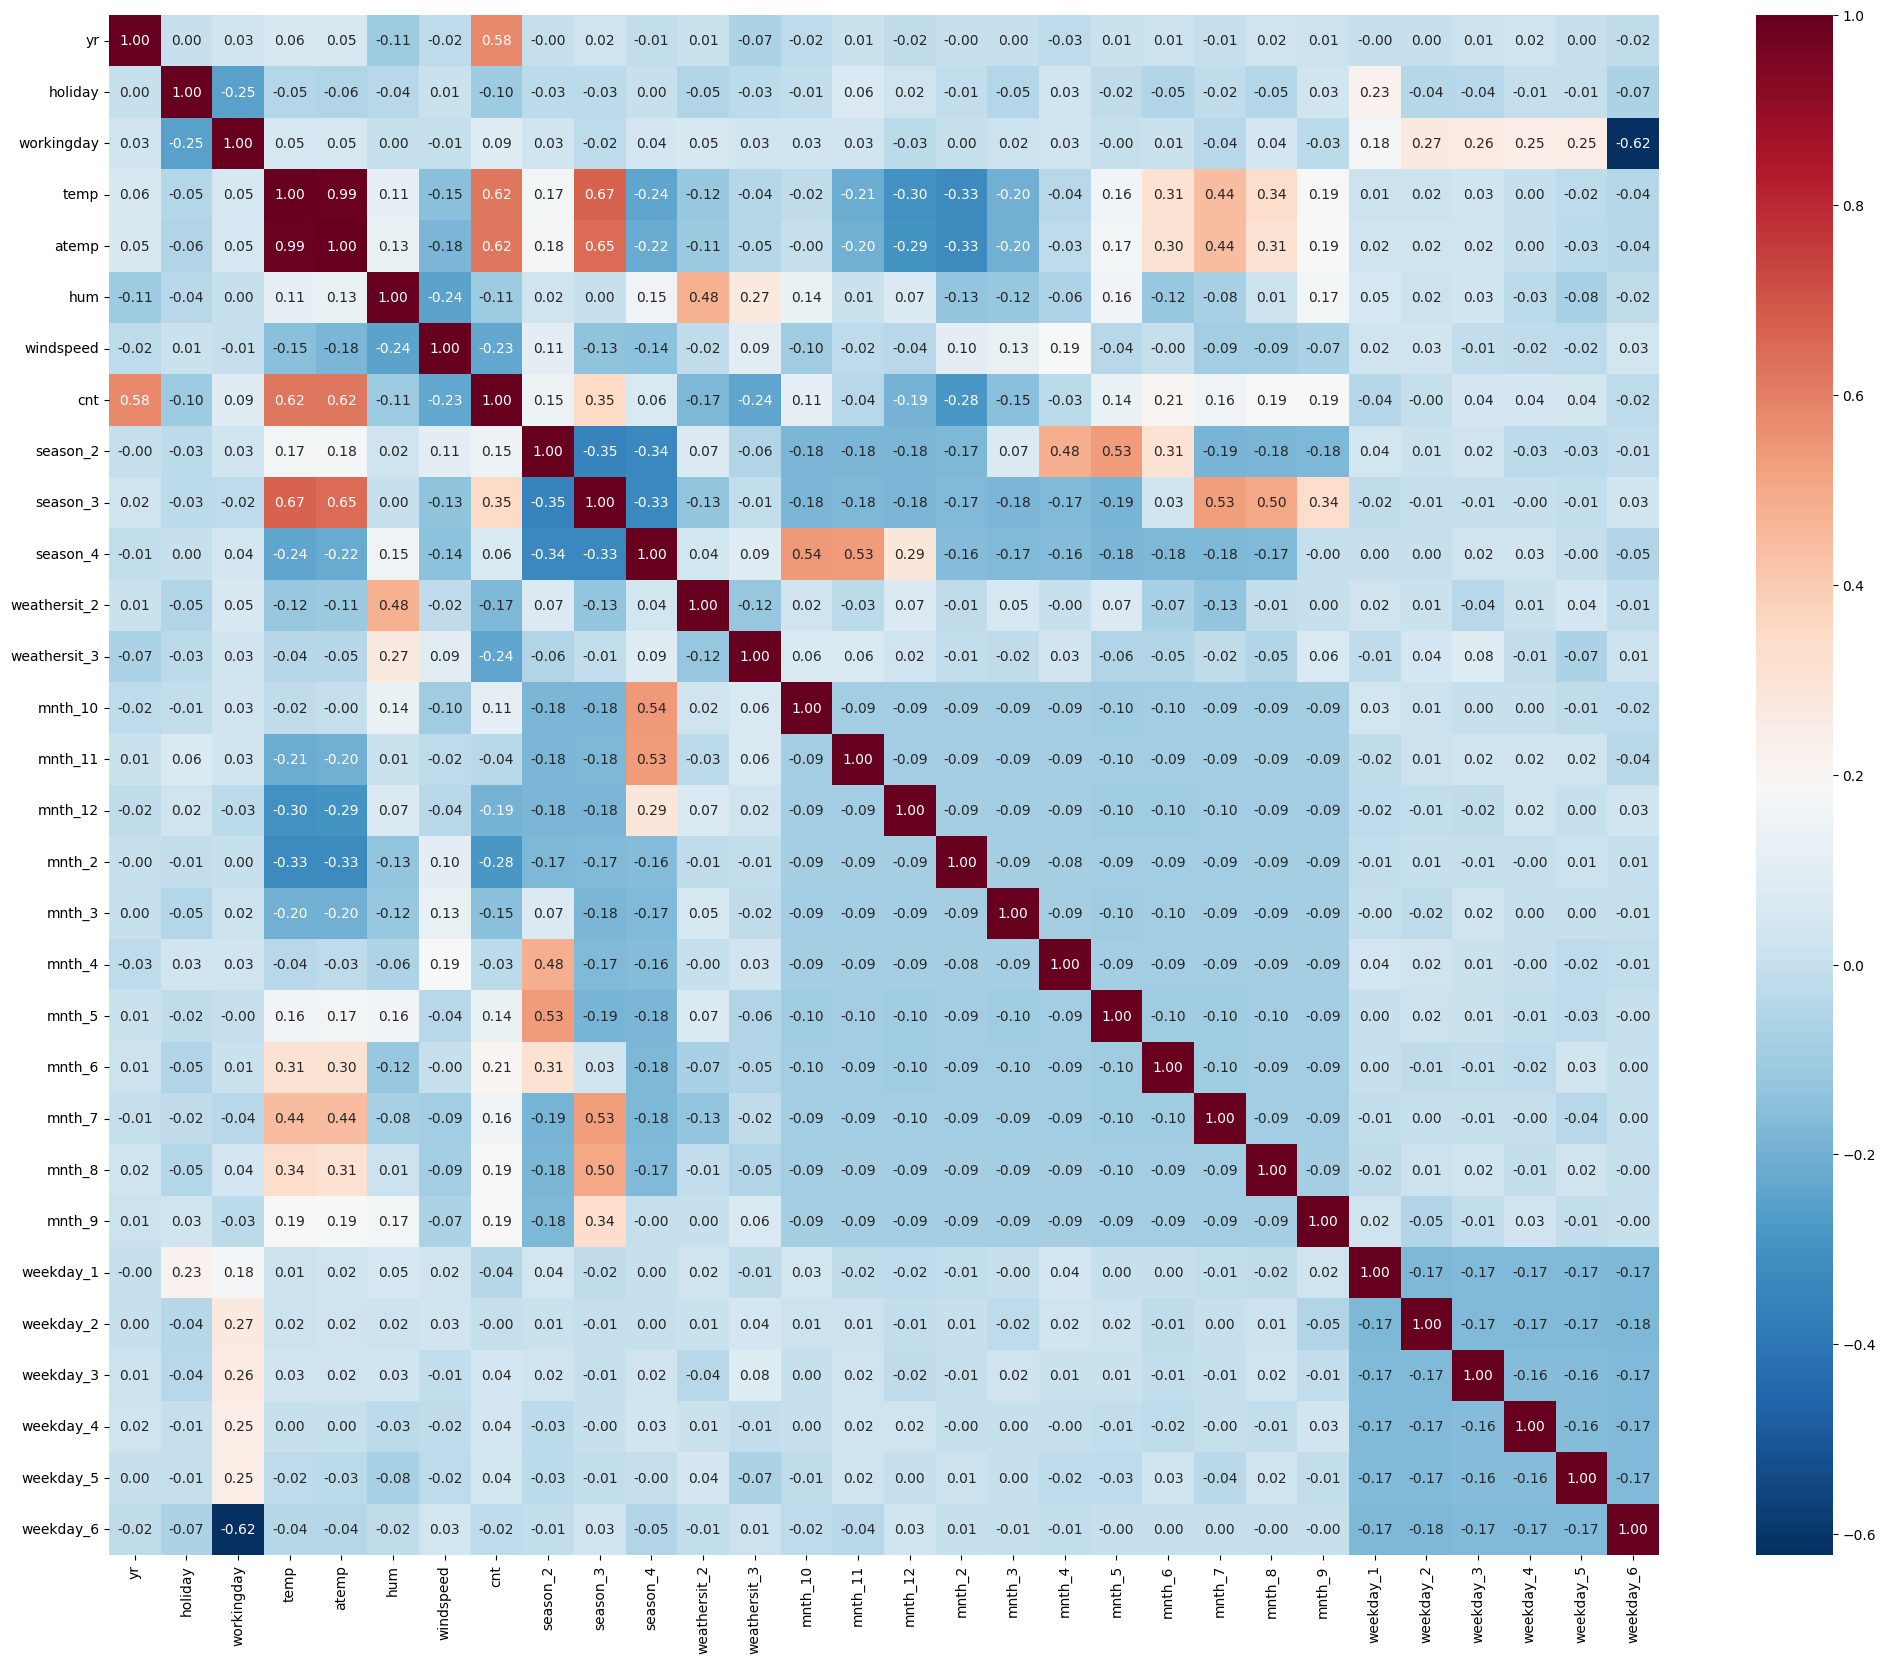

In [41]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='RdBu_r', fmt='.2f')
plt.show()

**According to the Heatmap, we can infer that all the variables are multiColinear in nature, but only 3 Variables are highly corelated to the Target variable (cnt), that are; 'yr', 'temp' and 'atemp'.**

## Plotting the Pairplot

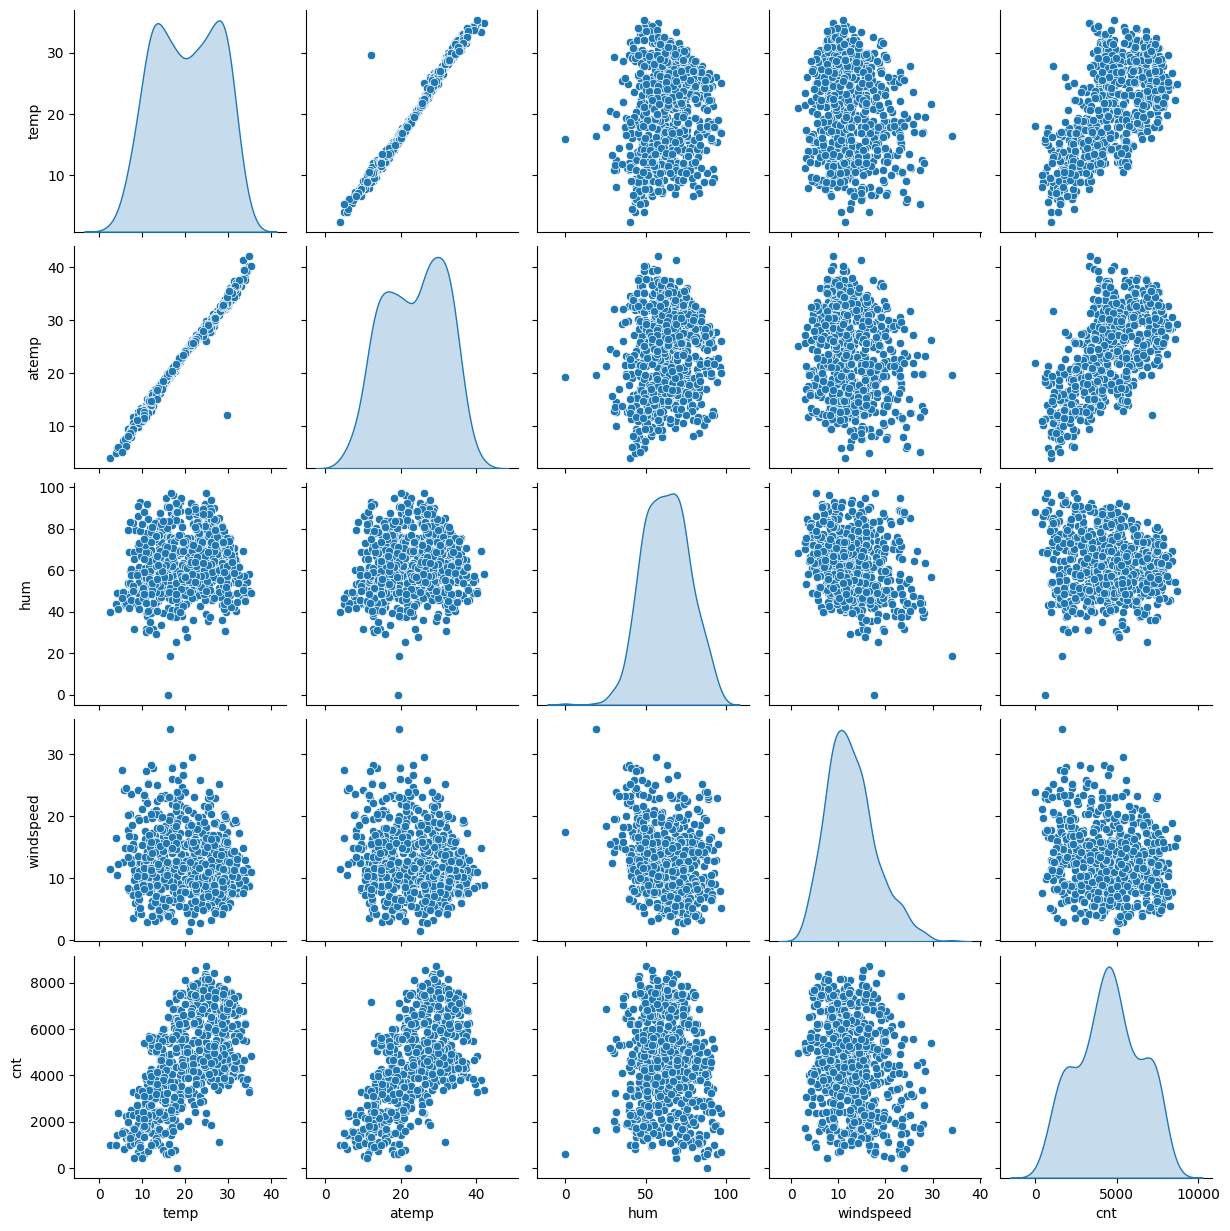

In [42]:
df_numericals = df_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(df_numericals, diag_kind='kde')
plt.show()

## Plotting the BoxPLot

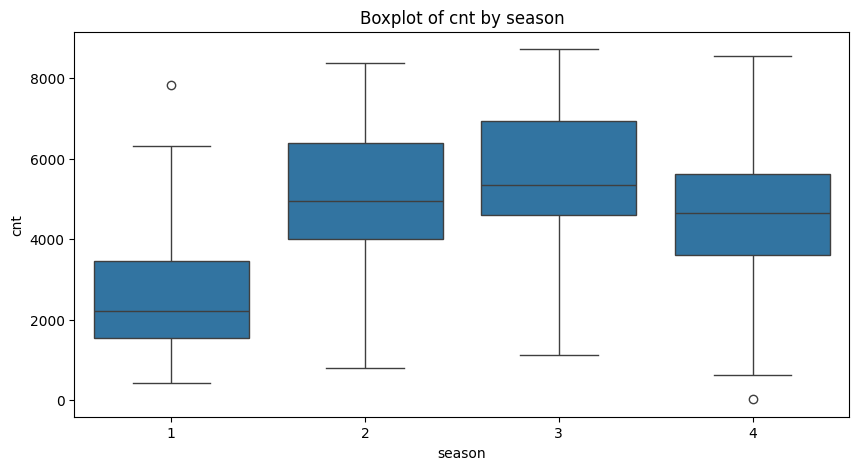

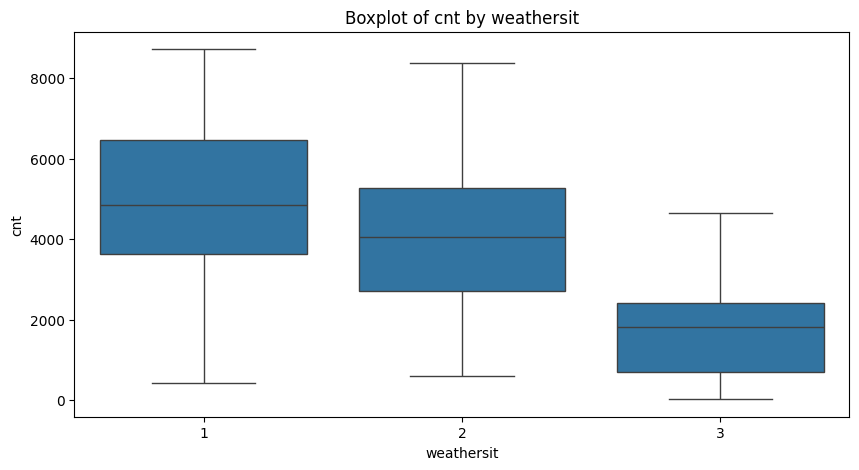

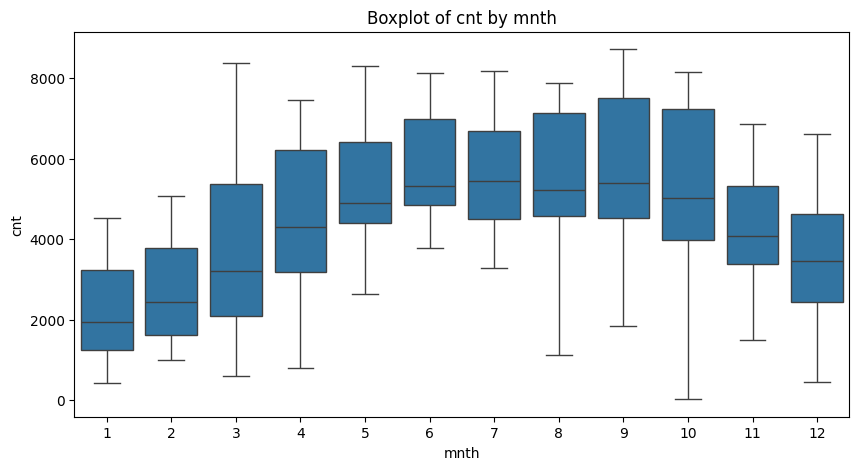

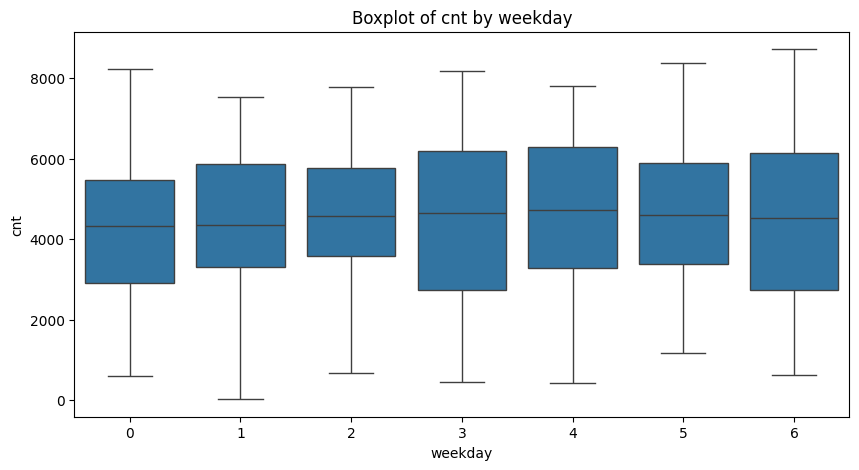

In [43]:
for i in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df_dup[i], y=df_dup['cnt'])
    plt.title(f'Boxplot of cnt by {i}')
    plt.show()

## Training the Multiple Linear Regression Model 

In [44]:
df_train = df_train.drop(columns=['hum', 'windspeed'])
df_test = df_test.drop(columns=['hum', 'windspeed'])

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Calculating Deviation and Accuracy

In [46]:
X_test = df_test.drop(columns=['cnt'])
y_test = df_test['cnt']
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 623.2316748255879
Mean Squared Error (MSE): 855727.3847956219
Root Mean Squared Error (RMSE): 925.0553414772663
R-squared (R2 ): 0.7797422425549188


In [48]:
print("Training Set Evaluation Metrics: {:.4f}".format(model.score(X_train, y_train)))
print("Test Set Evaluation Metrics: {:.4f}".format(model.score(X_test, y_test)))

Training Set Evaluation Metrics: 0.8481
Test Set Evaluation Metrics: 0.7797


## Comprehensive Model Performance Evaluation

In [49]:
# Comprehensive Model Performance Evaluation
print("="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

# 1. Basic Metrics
print("\n1. REGRESSION METRICS:")
print("-"*60)
print(f"Mean Absolute Error (MAE):        {mae:.2f}")
print(f"Mean Squared Error (MSE):         {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse:.2f}")
print(f"R² Score (Test):                  {r2:.4f}")
print(f"R² Score (Train):                 {model.score(X_train, y_train):.4f}")

# 2. Model Coefficients
print("\n2. MODEL COEFFICIENTS:")
print("-"*60)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients.to_string(index=False))
print(f"\nIntercept: {model.intercept_:.2f}")

# 3. Residual Analysis
residuals = y_test - y_pred
print("\n3. RESIDUAL ANALYSIS:")
print("-"*60)
print(f"Mean of Residuals:                {np.mean(residuals):.2f}")
print(f"Std Dev of Residuals:             {np.std(residuals):.2f}")
print(f"Min Residual:                     {np.min(residuals):.2f}")
print(f"Max Residual:                     {np.max(residuals):.2f}")

# 4. Prediction Range
print("\n4. PREDICTION ANALYSIS:")
print("-"*60)
print(f"Actual values range:              {y_test.min():.0f} - {y_test.max():.0f}")
print(f"Predicted values range:           {y_pred.min():.0f} - {y_pred.max():.0f}")
print(f"Mean Actual:                      {y_test.mean():.2f}")
print(f"Mean Predicted:                   {y_pred.mean():.2f}")

# 5. Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"\nMean Absolute Percentage Error:   {mape:.2f}%")

print("\n" + "="*60)

MODEL PERFORMANCE EVALUATION

1. REGRESSION METRICS:
------------------------------------------------------------
Mean Absolute Error (MAE):        623.23
Mean Squared Error (MSE):         855727.38
Root Mean Squared Error (RMSE):   925.06
R² Score (Test):                  0.7797
R² Score (Train):                 0.8481

2. MODEL COEFFICIENTS:
------------------------------------------------------------
     Feature  Coefficient
weathersit_3 -2538.738752
          yr  2095.384417
    season_4  1726.415541
      mnth_9  1282.192603
      mnth_5  1002.307960
      mnth_6   956.622296
    season_2   923.082239
    season_3   900.075672
      mnth_8   893.982221
weathersit_2  -698.819019
     mnth_10   633.064351
      mnth_3   580.779433
      mnth_4   543.392157
      mnth_7   502.652461
     holiday  -461.037829
   weekday_6   370.661764
  workingday   363.926612
   weekday_1  -263.315424
      mnth_2   228.527508
   weekday_5   166.273695
     mnth_12  -102.876175
   weekday_2   -65.13

## Visualizing Model Performance

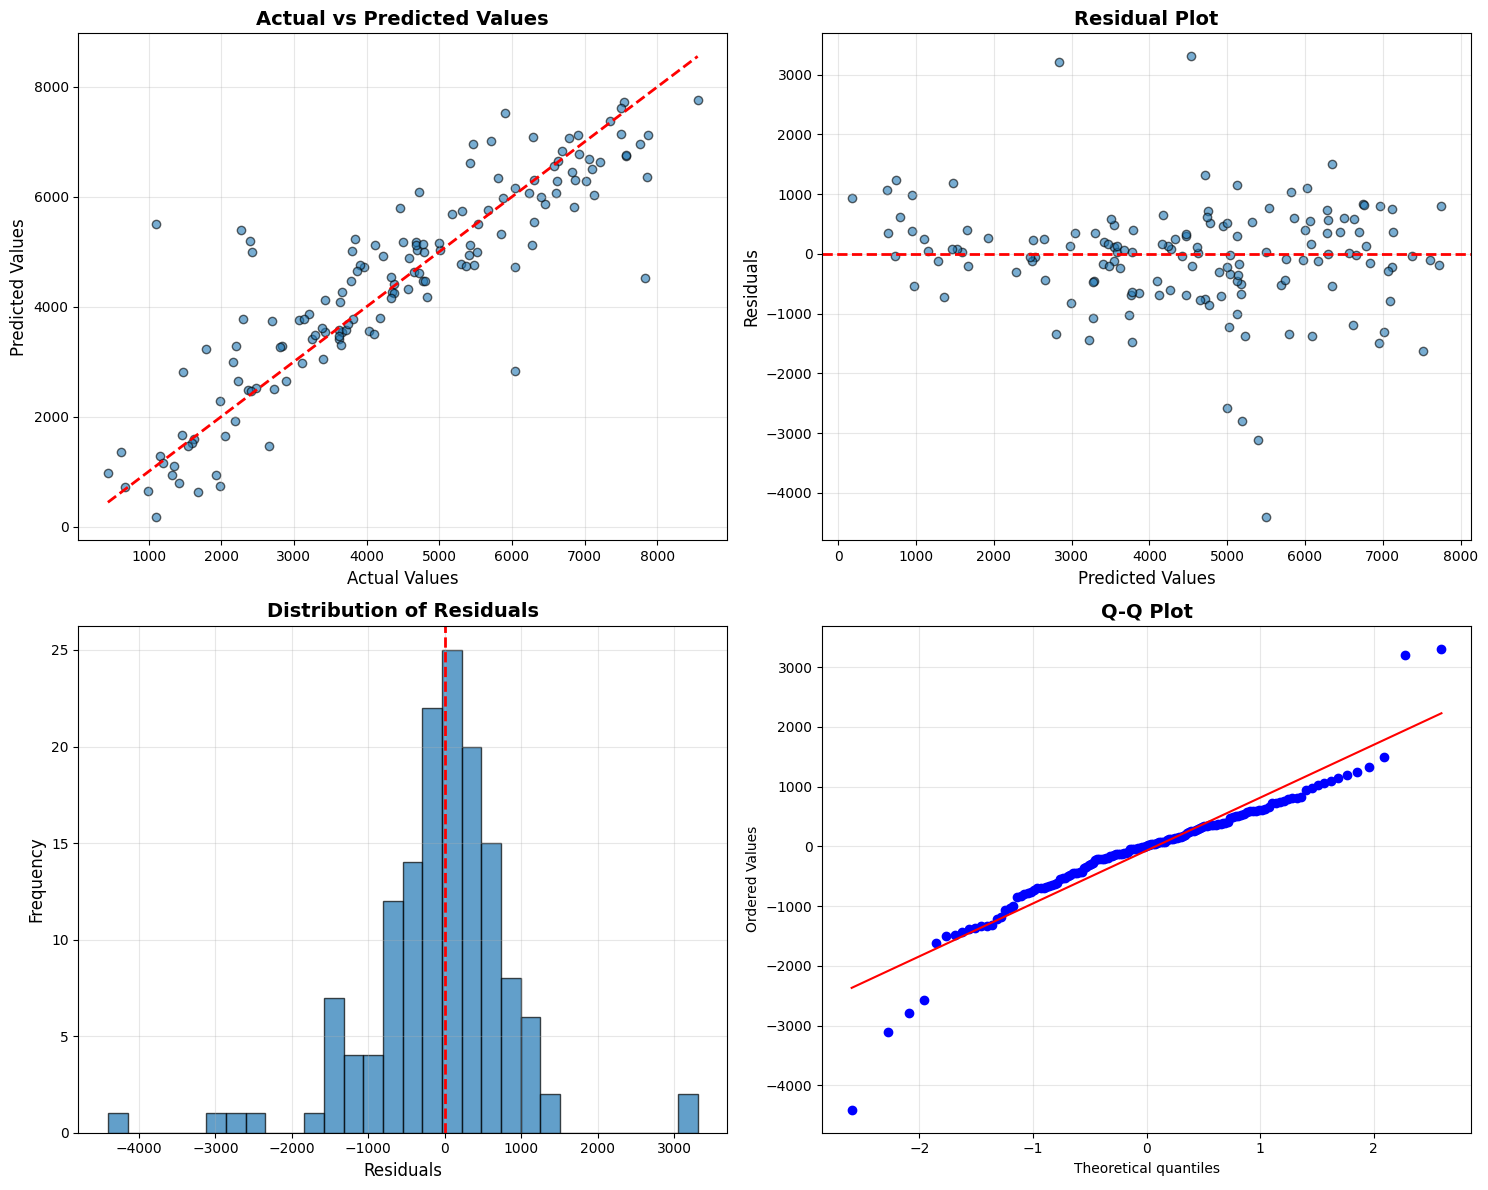

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()